Experiment 1 with IAM dataset
============================================

In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets, models, transforms
import time
import os
from utils import *
from classes import *

use_gpu = torch.cuda.is_available()

print('main imports complete')

main imports complete


In [2]:
# ========================================
# Step 1. define data transform
#
# Including different forms of data augmentation
# One will include nearly all types (excluding random crops, etc. that may remove handwriting.)
# The other will include a selected set of augmentations
# Keeping 'train', 'val', and 'test' transforms just in case we want to include different functionalities
# ========================================

# Need the __name__ check to make multiprocessing work on Windows for some reason
# if __name__ == '__main__':
print("Set up data transforms.")
img_input_size = 56

selected_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        # RandomRotation does not seem to be working on Windows right now
        transforms.RandomRotation(45),

        transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.5),
        transforms.RandomGrayscale(p=0.1),

        transforms.Grayscale(), # not sure why the current input is not grayscale, do grayscale conversion
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    # should not do random transformation in val or test set
    'val': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
}

net1_data_transforms = {
    'train': transforms.Compose([
#         transforms.Resize(64),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Grayscale(),
        transforms.ToTensor()
        
    ]),
    'val': transforms.Compose([
#         transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
    
    'test': transforms.Compose([
#         transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
}

# data_transforms = selected_transforms
data_transforms = net1_data_transforms


Set up data transforms.


In [3]:
all_data_dir = '/home/rahul/data/handwriting/sampled/dim64x64-stride8x8/train_val_test-3'
set_types = ['train', 'val', 'test']

imagefolders = {t : datasets.ImageFolder(os.path.join(all_data_dir, t),
                                        transform = data_transforms[t])
               for t in set_types}
for t in set_types:
    print(str(t) + ' count:', len(imagefolders[t]))

train count: 7723
val count: 3478
test count: 2115


device_name cuda
Creating Net1.

Epoch 0/999
----------
Phase:train
average loss: 0.26795665237719296
f1_pos: 0.8903259865382077
f1_neg: 0.8943957300800609

Phase:val
average loss: 0.9129724763740816
f1_pos: 0.3146067415730337
f1_neg: 0.7642967542503865


Epoch 1/999
----------
Phase:train
average loss: 0.1748826353372139
f1_pos: 0.9304048690129665
f1_neg: 0.933316430020284

Phase:val
average loss: 0.9056186076894172
f1_pos: 0.471841704718417
f1_neg: 0.7911735205616851


Epoch 2/999
----------
Phase:train
average loss: 0.16359159681826896
f1_pos: 0.9371127224785762
f1_neg: 0.9393206971123266

Phase:val
average loss: 0.6517085312357437
f1_pos: 0.8469539375928677
f1_neg: 0.8565859092174882


Epoch 3/999
----------
Phase:train
average loss: 0.15277562965449004
f1_pos: 0.9409277124355754
f1_neg: 0.9432669120446757

Phase:val
average loss: 1.3054685792133272
f1_pos: 0.48142788229618905
f1_neg: 0.7798484538193733


Epoch 4/999
----------
Phase:train
average loss: 0.15011094521167256
f1_pos: 

Phase:val
average loss: 3.815342349660609
f1_pos: 0.6192486281131279
f1_neg: 0.18665464382326422


Epoch 37/999
----------
Phase:train
average loss: 0.10874273694273136
f1_pos: 0.9560512076019533
f1_neg: 0.9576820434616851

Phase:val
average loss: 0.9084013337853175
f1_pos: 0.6113499570077386
f1_neg: 0.8047516198704103


Epoch 38/999
----------
Phase:train
average loss: 0.09757520969719308
f1_pos: 0.9563029661016949
f1_neg: 0.9581960983025082

Phase:val
average loss: 2.176345593700332
f1_pos: 0.625
f1_neg: 0.22486772486772488


Epoch 39/999
----------
Phase:train
average loss: 0.1015156769299467
f1_pos: 0.9583003430984428
f1_neg: 0.9598373157092018

Phase:val
average loss: 6.7095020956661315
f1_pos: 0.6023799753795651
f1_neg: 0.06916426512968299


Epoch 40/999
----------
Phase:train
average loss: 0.10063404394052011
f1_pos: 0.9564757243021563
f1_neg: 0.9582857867376695

Phase:val
average loss: 0.5060143845049796
f1_pos: 0.7998565279770444
f1_neg: 0.8661228406909789


Epoch 41/999
-----

Phase:val
average loss: 0.851343392811677
f1_pos: 0.6727122835943941
f1_neg: 0.8247240618101546


Epoch 74/999
----------
Phase:train
average loss: 0.08138264966645066
f1_pos: 0.9632954845524162
f1_neg: 0.9646849593495934

Phase:val
average loss: 2.664325155082141
f1_pos: 0.6311034631103463
f1_neg: 0.25661031642826176


Epoch 75/999
----------
Phase:train
average loss: 0.08750461886255725
f1_pos: 0.9623165410551369
f1_neg: 0.9638462514271215

Phase:val
average loss: 1.786079612869583
f1_pos: 0.6417746540742367
f1_neg: 0.3212650853100292


Epoch 76/999
----------
Phase:train
average loss: 0.08806609230292796
f1_pos: 0.9589403973509935
f1_neg: 0.9607396149949342

Phase:val
average loss: 0.7923788024886989
f1_pos: 0.7490494296577946
f1_neg: 0.8474341192787795


Epoch 77/999
----------
Phase:train
average loss: 0.09150872760511782
f1_pos: 0.9601377301019733
f1_neg: 0.9618746041798607

Phase:val
average loss: 6.1220978231797485
f1_pos: 0.6043639357760395
f1_neg: 0.08388941849380363


Epoch 

Phase:val
average loss: 1.8298819040415821
f1_pos: 0.4162754303599373
f1_neg: 0.7779321293907522


Epoch 111/999
----------
Phase:train
average loss: 0.08365849608891401
f1_pos: 0.9598626881436493
f1_neg: 0.9613821138211381

Phase:val
average loss: 0.8075691610317658
f1_pos: 0.7359073359073359
f1_neg: 0.8433348602840129


Epoch 112/999
----------
Phase:train
average loss: 0.08064415796126755
f1_pos: 0.961114797611148
f1_neg: 0.9629629629629629

Phase:val
average loss: 2.896024137889605
f1_pos: 0.6234594135146622
f1_neg: 0.21244444444444444


Epoch 113/999
----------
Phase:train
average loss: 0.07525841732441059
f1_pos: 0.9633161170705867
f1_neg: 0.964914502849905

Phase:val
average loss: 1.2889184133974967
f1_pos: 0.6602165399677493
f1_neg: 0.4359464627151051


Epoch 114/999
----------
Phase:train
average loss: 0.08242175159280078
f1_pos: 0.9611111111111111
f1_neg: 0.9627187420745625

Phase:val
average loss: 2.3996262414624048
f1_pos: 0.35482093663911846
f1_neg: 0.7722233028593658


Ep

Phase:train
average loss: 0.054483622669494476
f1_pos: 0.974169741697417
f1_neg: 0.9750572664800204

Phase:val
average loss: 2.0057761336689093
f1_pos: 0.5358378645575878
f1_neg: 0.8096493006284208


Epoch 148/999
----------
Phase:train
average loss: 0.05873310549487845
f1_pos: 0.9713076821367183
f1_neg: 0.9724724089813522

Phase:val
average loss: 6.15961229945134
f1_pos: 0.6090022816842978
f1_neg: 0.117096018735363


Epoch 149/999
----------
Phase:train
average loss: 0.05705265087733595
f1_pos: 0.9695525549377813
f1_neg: 0.9708565636087175

Phase:val
average loss: 2.991149289502434
f1_pos: 0.3685666851134477
f1_neg: 0.7784035735094194


Epoch 150/999
----------
Phase:train
average loss: 0.05589413351632455
f1_pos: 0.9723946638488972
f1_neg: 0.9734603174603175

Phase:val
average loss: 1.3581454257570238
f1_pos: 0.6376021798365122
f1_neg: 0.8321413546487169


Epoch 151/999
----------
Phase:train
average loss: 0.0574853947330915
f1_pos: 0.9704361659817048
f1_neg: 0.9717828672655954

Phas

Phase:train
average loss: 0.05194602268296373
f1_pos: 0.9746031746031746
f1_neg: 0.9756530560486939

Phase:val
average loss: 0.39514518778100655
f1_pos: 0.885896527285613
f1_neg: 0.9221093372036768


Epoch 185/999
----------
Phase:train
average loss: 0.04200423930974362
f1_pos: 0.9754033324517325
f1_neg: 0.9764079147640791

Phase:val
average loss: 14.92610821167308
f1_pos: 0.6058981233243967
f1_neg: 0.09302325581395349


Epoch 186/999
----------
Phase:train
average loss: 0.04627409263592487
f1_pos: 0.9734443123265953
f1_neg: 0.9744826710676653

Phase:val
average loss: 0.6180851764724199
f1_pos: 0.8335238095238096
f1_neg: 0.899099515123528


Epoch 187/999
----------
Phase:train
average loss: 0.04348591676950796
f1_pos: 0.9741892786234283
f1_neg: 0.9752883031301482

Phase:val
average loss: 0.4093806328548653
f1_pos: 0.8868523087768769
f1_neg: 0.922068463219228


Epoch 188/999
----------
Phase:train
average loss: 0.04730395767386753
f1_pos: 0.9732733527388198
f1_neg: 0.9743914807302232

P

Phase:val
average loss: 3.248102951351427
f1_pos: 0.452054794520548
f1_neg: 0.7943851324634242


Epoch 221/999
----------
Phase:train
average loss: 0.04141791386153078
f1_pos: 0.9749900754267566
f1_neg: 0.9760425909494234

Phase:val
average loss: 0.6326015139530965
f1_pos: 0.8524970963995354
f1_neg: 0.9128744568945805


Epoch 222/999
----------
Phase:train
average loss: 0.04066044304056341
f1_pos: 0.9768487895224237
f1_neg: 0.9778115886902499

Phase:val
average loss: 0.28941623230323904
f1_pos: 0.9183327685530328
f1_neg: 0.9398252184769038


Epoch 223/999
----------
Phase:train
average loss: 0.044522497405023224
f1_pos: 0.9721337579617836
f1_neg: 0.9734513274336283

Phase:val
average loss: 0.5798599639968532
f1_pos: 0.8735976065818998
f1_neg: 0.9210649229332087


Epoch 224/999
----------
Phase:train
average loss: 0.037876194427951544
f1_pos: 0.9794086589229145
f1_neg: 0.9801778907242694

Phase:val
average loss: 2.181596273591698
f1_pos: 0.6605922551252847
f1_neg: 0.8435202688510817


E

Phase:train
average loss: 0.041253472407855596
f1_pos: 0.977942147668736
f1_neg: 0.9787936507936509

Phase:val
average loss: 1.4187107775113992
f1_pos: 0.6751799396331554
f1_neg: 0.4718761796904492


Epoch 258/999
----------
Phase:train
average loss: 0.04431884739102747
f1_pos: 0.9745560561887092
f1_neg: 0.9756962025316456

Phase:val
average loss: 0.9706996397220794
f1_pos: 0.6855791962174941
f1_neg: 0.5121056493030082


Epoch 259/999
----------
Phase:train
average loss: 0.034964506189106966
f1_pos: 0.977143612101995
f1_neg: 0.9780373238542592

Phase:val
average loss: 0.8687913025707401
f1_pos: 0.8523331364441818
f1_neg: 0.8599439775910365


Epoch 260/999
----------
Phase:train
average loss: 0.0512719368266052
f1_pos: 0.9750099166997224
f1_neg: 0.9760243562095648

Phase:val
average loss: 1.9759099228482195
f1_pos: 0.6703550023052097
f1_neg: 0.453781512605042


Epoch 261/999
----------
Phase:train
average loss: 0.04525849240429619
f1_pos: 0.9754098360655737
f1_neg: 0.9764019284445572

P

Phase:val
average loss: 3.466478607447549
f1_pos: 0.4649947753396029
f1_neg: 0.7969059896866324


Epoch 294/999
----------
Phase:train
average loss: 0.05598899461454398
f1_pos: 0.9687458438622156
f1_neg: 0.9703544846726379

Phase:val
average loss: 3.640241824737426
f1_pos: 0.5078720162519045
f1_neg: 0.805694806496892


Epoch 295/999
----------
Phase:train
average loss: 0.042357623467621494
f1_pos: 0.9771677444899036
f1_neg: 0.9780149955521668

Phase:val
average loss: 0.3414017861605102
f1_pos: 0.9184763260946956
f1_neg: 0.944779358572462


Epoch 296/999
----------
Phase:train
average loss: 0.039864296650350725
f1_pos: 0.9757712167350723
f1_neg: 0.9768148992778412

Phase:val
average loss: 0.9574368498049775
f1_pos: 0.8395743003547498
f1_neg: 0.9078977144150261


Epoch 297/999
----------
Phase:train
average loss: 0.041084800256221084
f1_pos: 0.9774197808002113
f1_neg: 0.9782801981455608

Phase:val
average loss: 3.0001205398544215
f1_pos: 0.5654296875000001
f1_neg: 0.8186634066829667


Ep

Phase:train
average loss: 0.03630515730506101
f1_pos: 0.9767010855176066
f1_neg: 0.9776989356310187

Phase:val
average loss: 1.133648594471831
f1_pos: 0.6885788602506503
f1_neg: 0.5170517051705171


Epoch 331/999
----------
Phase:train
average loss: 0.037633209912167655
f1_pos: 0.9789029535864979
f1_neg: 0.979648944288985

Phase:val
average loss: 0.7541097132997858
f1_pos: 0.8681696599159343
f1_neg: 0.9204885918414382


Epoch 332/999
----------
Phase:train
average loss: 0.03690035184062393
f1_pos: 0.9765965886552955
f1_neg: 0.9775466193073703

Phase:val
average loss: 2.4422808403664447
f1_pos: 0.6685044796691937
f1_neg: 0.44563964656165955


Epoch 333/999
----------
Phase:train
average loss: 0.0438415075101322
f1_pos: 0.9748077433041632
f1_neg: 0.9759615384615384

Phase:val
average loss: 0.4225165046892885
f1_pos: 0.9045033535611626
f1_neg: 0.9218300653594771


Epoch 334/999
----------
Phase:train
average loss: 0.03546541623776497
f1_pos: 0.9756226815050344
f1_neg: 0.9767029627753863



Phase:val
average loss: 0.43357393108715336
f1_pos: 0.9110684580934102
f1_neg: 0.9274151436031332


Epoch 367/999
----------
Phase:train
average loss: 0.03531758398349176
f1_pos: 0.975635593220339
f1_neg: 0.9766911578413985

Phase:val
average loss: 0.4450042936104752
f1_pos: 0.9186500888099467
f1_neg: 0.9446993479835788


Epoch 368/999
----------
Phase:train
average loss: 0.03430369934982414
f1_pos: 0.975059697532502
f1_neg: 0.9762266059686394

Phase:val
average loss: 0.4081392892009229
f1_pos: 0.9236259814418273
f1_neg: 0.9484833895040924


Epoch 369/999
----------
Phase:train
average loss: 0.03940811252893638
f1_pos: 0.9748210972700768
f1_neg: 0.9759493670886076

Phase:val
average loss: 0.28516908137040997
f1_pos: 0.9364362625911774
f1_neg: 0.9551140544518028


Epoch 370/999
----------
Phase:train
average loss: 0.032153967867102104
f1_pos: 0.9800817834058831
f1_neg: 0.9808010171646536

Phase:val
average loss: 0.6167958178795776
f1_pos: 0.9052010328292143
f1_neg: 0.9394581861012956




Phase:train
average loss: 0.034129343478885465
f1_pos: 0.9764363251257613
f1_neg: 0.9774455144450076

Phase:val
average loss: 0.5535841480651554
f1_pos: 0.9116997792494481
f1_neg: 0.9433695139216611


Epoch 404/999
----------
Phase:train
average loss: 0.03862305185920978
f1_pos: 0.9746717941917518
f1_neg: 0.9758380771663504

Phase:val
average loss: 0.35719800376520205
f1_pos: 0.9269863994273443
f1_neg: 0.9509851033157136


Epoch 405/999
----------
Phase:train
average loss: 0.03860939628649526
f1_pos: 0.9802475638662101
f1_neg: 0.9808965868568518

Phase:val
average loss: 9.77772665627048
f1_pos: 0.6239116585262263
f1_neg: 0.21183800623052962


Epoch 406/999
----------
Phase:train
average loss: 0.03503788248968358
f1_pos: 0.9787234042553192
f1_neg: 0.9795659347632949

Phase:val
average loss: 0.4202622856951226
f1_pos: 0.9080310880829016
f1_neg: 0.9265770423991727


Epoch 407/999
----------
Phase:train
average loss: 0.035772195043194004
f1_pos: 0.9739846031324662
f1_neg: 0.975227502527805

Phase:val
average loss: 0.6395248152259919
f1_pos: 0.9010416666666667
f1_neg: 0.9376757263355202


Epoch 440/999
----------
Phase:train
average loss: 0.036403975656389136
f1_pos: 0.9780771262546223
f1_neg: 0.9789179578359156

Phase:val
average loss: 1.0107080889817557
f1_pos: 0.8529238038984052
f1_neg: 0.8605042016806723


Epoch 441/999
----------
Phase:train
average loss: 0.03923381897222304
f1_pos: 0.9754934428401113
f1_neg: 0.9765733822970747

Phase:val
average loss: 3.0143352110129515
f1_pos: 0.6554508748317631
f1_neg: 0.3851080864691753


Epoch 442/999
----------
Phase:train
average loss: 0.0318616541922787
f1_pos: 0.979678015307469
f1_neg: 0.9804270462633452

Phase:val
average loss: 1.250690055962881
f1_pos: 0.8371541501976284
f1_neg: 0.9069136918210574


Epoch 443/999
----------
Phase:train
average loss: 0.03745578818030922
f1_pos: 0.9769902142290399
f1_neg: 0.9779299847792998

Phase:val
average loss: 0.7342760392891531
f1_pos: 0.8897224306076519
f1_neg: 0.9314685314685315


Epo

Phase:train
average loss: 0.035373341042399364
f1_pos: 0.9741070242995619
f1_neg: 0.9753632343651294

Phase:val
average loss: 0.4607622126024163
f1_pos: 0.9096172402701833
f1_neg: 0.9269560696646738


Epoch 477/999
----------
Phase:train
average loss: 0.0349644937324565
f1_pos: 0.9764550264550265
f1_neg: 0.9774283540451432

Phase:val
average loss: 2.7924368382871254
f1_pos: 0.6451897616946162
f1_neg: 0.3366336633663366


Epoch 478/999
----------
Phase:train
average loss: 0.03841065921248388
f1_pos: 0.9749768303985172
f1_neg: 0.9760547320410491

Phase:val
average loss: 0.3971764990623961
f1_pos: 0.9223334483948912
f1_neg: 0.9445676274944569


Epoch 479/999
----------
Phase:train
average loss: 0.035730277549472535
f1_pos: 0.9771375710321132
f1_neg: 0.9780428988450312

Phase:val
average loss: 5.405609620858226
f1_pos: 0.6454886388705052
f1_neg: 0.33677259595542713


Epoch 480/999
----------
Phase:train
average loss: 0.036357880192454874
f1_pos: 0.9776602775941838
f1_neg: 0.978556020809542

Phase:train
average loss: 0.06765785482454628
f1_pos: 0.9731942427043443
f1_neg: 0.9742156738219231

Phase:val
average loss: 0.4656333877068268
f1_pos: 0.912542372881356
f1_neg: 0.9355966050923614


Epoch 514/999
----------
Phase:train
average loss: 0.03747368453839031
f1_pos: 0.9738622794215205
f1_neg: 0.9750916677203186

Phase:val
average loss: 1.1850541245327249
f1_pos: 0.8324066719618745
f1_neg: 0.9049121225777377


Epoch 515/999
----------
Phase:train
average loss: 0.03449705099028796
f1_pos: 0.979133650290544
f1_neg: 0.9799339598679196

Phase:val
average loss: 0.435452324150279
f1_pos: 0.9051808406647116
f1_neg: 0.925135065603293


Epoch 516/999
----------
Phase:train
average loss: 0.03628133714419024
f1_pos: 0.977536997885835
f1_neg: 0.9784209190149784

Phase:val
average loss: 0.34539579778755447
f1_pos: 0.9196185286103542
f1_neg: 0.9412935323383084


Epoch 517/999
----------
Phase:train
average loss: 0.032645185461239366
f1_pos: 0.9780713342140027
f1_neg: 0.978923311325546

Pha

Phase:train
average loss: 0.03683568741926046
f1_pos: 0.976055033734621
f1_neg: 0.9770508431596298

Phase:val
average loss: 0.6266614018739675
f1_pos: 0.7143964848798139
f1_neg: 0.6420472951085195


Epoch 551/999
----------
Phase:train
average loss: 0.03890100392634412
f1_pos: 0.9756806767116045
f1_neg: 0.9766497461928934

Phase:val
average loss: 0.6201336260257335
f1_pos: 0.8956970740103269
f1_neg: 0.925203653418909


Epoch 552/999
----------
Phase:train
average loss: 0.0657595580815883
f1_pos: 0.9717305151915456
f1_neg: 0.9728288471305231

Phase:val
average loss: 0.9201502011657241
f1_pos: 0.8611793611793611
f1_neg: 0.8778378378378379


Epoch 553/999
----------
Phase:train
average loss: 0.04130656553945339
f1_pos: 0.976215644820296
f1_neg: 0.977151561309977

Phase:val
average loss: 0.8647255594700215
f1_pos: 0.8755391250770178
f1_neg: 0.8911051212938007


Epoch 554/999
----------
Phase:train
average loss: 0.04078073719929782
f1_pos: 0.9741619186431694
f1_neg: 0.9753133308013672

Phas

Phase:train
average loss: 0.03116322044500117
f1_pos: 0.9803507846498747
f1_neg: 0.9810504896349994

Phase:val
average loss: 0.2914804258287947
f1_pos: 0.9417952314165499
f1_neg: 0.9595516569200779


Epoch 588/999
----------
Phase:train
average loss: 0.032350055294769316
f1_pos: 0.9796672828096118
f1_neg: 0.9804369918699187

Phase:val
average loss: 0.38780766531456606
f1_pos: 0.9298183113644461
f1_neg: 0.9525186791998072


Epoch 589/999
----------
Phase:train
average loss: 0.03207445830468687
f1_pos: 0.9777836551176938
f1_neg: 0.9786910197869102

Phase:val
average loss: 0.30083181316171176
f1_pos: 0.9342059937995177
f1_neg: 0.9528744140143105


Epoch 590/999
----------
Phase:train
average loss: 0.03287067041358178
f1_pos: 0.9768303985171455
f1_neg: 0.9778284555935639

Phase:val
average loss: 0.7123701329406752
f1_pos: 0.9034892353377877
f1_neg: 0.9389957766306898


Epoch 591/999
----------
Phase:train
average loss: 0.033378273749063915
f1_pos: 0.9766887417218543
f1_neg: 0.9777102330293

Phase:train
average loss: 0.034149795593766734
f1_pos: 0.9782120691931863
f1_neg: 0.9790422964562429

Phase:val
average loss: 0.3943414940804569
f1_pos: 0.9314002828854314
f1_neg: 0.9530038759689922


Epoch 625/999
----------
Phase:train
average loss: 0.031091165740805542
f1_pos: 0.9792520153297212
f1_neg: 0.9800736134027161

Phase:val
average loss: 0.48069319782790404
f1_pos: 0.9286229271809661
f1_neg: 0.9526542324246773


Epoch 626/999
----------
Phase:train
average loss: 0.03560376821060667
f1_pos: 0.9764238410596028
f1_neg: 0.9774569402228976

Phase:val
average loss: 2.7265084080479487
f1_pos: 0.7192676547515258
f1_neg: 0.8618618618618619


Epoch 627/999
----------
Phase:train
average loss: 0.03426188286155111
f1_pos: 0.979133650290544
f1_neg: 0.9799339598679196

Phase:val
average loss: 0.46408502996619094
f1_pos: 0.9175977653631284
f1_neg: 0.9423264907135874


Epoch 628/999
----------
Phase:train
average loss: 0.02946145701462459
f1_pos: 0.9789932619896948
f1_neg: 0.97981465024755

Phase:val
average loss: 1.065413073913471
f1_pos: 0.8573123702165529
f1_neg: 0.8658298465829847


Epoch 661/999
----------
Phase:train
average loss: 0.044594327441042726
f1_pos: 0.9754033324517325
f1_neg: 0.9764079147640791

Phase:val
average loss: 0.6019100587453015
f1_pos: 0.915487849111353
f1_neg: 0.9445105977613718


Epoch 662/999
----------
Phase:train
average loss: 0.04913014803436039
f1_pos: 0.9728440853093125
f1_neg: 0.9740407749778397

Phase:val
average loss: 0.5094597207713292
f1_pos: 0.9152782701169798
f1_neg: 0.9422007255139057


Epoch 663/999
----------
Phase:train
average loss: 0.03975925584360243
f1_pos: 0.9771677444899036
f1_neg: 0.9780149955521668

Phase:val
average loss: 0.5530835445616833
f1_pos: 0.9189189189189189
f1_neg: 0.9473684210526315


Epoch 664/999
----------
Phase:train
average loss: 0.03473690762766863
f1_pos: 0.9789988112534672
f1_neg: 0.9798095238095237

Phase:val
average loss: 0.3465808014063536
f1_pos: 0.9268123482483523
f1_neg: 0.9481954333415172


Ep

Phase:train
average loss: 0.036822527692360565
f1_pos: 0.9786110377607605
f1_neg: 0.979420731707317

Phase:val
average loss: 0.4808271322709997
f1_pos: 0.9194991055456172
f1_neg: 0.9459264599855803


Epoch 698/999
----------
Phase:train
average loss: 0.036288805977407246
f1_pos: 0.9782005548949664
f1_neg: 0.9790529389361433

Phase:val
average loss: 0.36217454969968654
f1_pos: 0.9337094499294781
f1_neg: 0.954368932038835


Epoch 699/999
----------
Phase:train
average loss: 0.03268181295588152
f1_pos: 0.9777777777777777
f1_neg: 0.9786964240426071

Phase:val
average loss: 0.30160858392149914
f1_pos: 0.9343814080656185
f1_neg: 0.9523573200992557


Epoch 700/999
----------
Phase:train
average loss: 0.03364772189668534
f1_pos: 0.9792793981786988
f1_neg: 0.9800482907612148

Phase:val
average loss: 0.9818320546155691
f1_pos: 0.8671544089333847
f1_neg: 0.9208534067446663


Epoch 701/999
----------
Phase:train
average loss: 0.04192175032834087
f1_pos: 0.9758352040142612
f1_neg: 0.976756001524196

Phase:train
average loss: 0.03475715519049444
f1_pos: 0.9781832606108687
f1_neg: 0.9790688824051756

Phase:val
average loss: 0.6698613581025374
f1_pos: 0.911504424778761
f1_neg: 0.9434495758718191


Epoch 735/999
----------
Phase:train
average loss: 0.03395973695593422
f1_pos: 0.9765531858524308
f1_neg: 0.9775864252247688

Phase:val
average loss: 0.41849690278142676
f1_pos: 0.9138381201044385
f1_neg: 0.932168550873587


Epoch 736/999
----------
Phase:train
average loss: 0.03289968948934295
f1_pos: 0.9764175940646529
f1_neg: 0.977462648771841

Phase:val
average loss: 0.362877231483284
f1_pos: 0.9288441513363416
f1_neg: 0.9496932515337422


Epoch 737/999
----------
Phase:train
average loss: 0.03352094349065714
f1_pos: 0.9784477059367975
f1_neg: 0.9793225929214766

Phase:val
average loss: 0.44958865368345674
f1_pos: 0.9210996072831132
f1_neg: 0.9468110709987966


Epoch 738/999
----------
Phase:train
average loss: 0.03417148867654095
f1_pos: 0.979403221547399
f1_neg: 0.9801829268292683

Ph

Phase:val
average loss: 4.019257924966664
f1_pos: 0.6468763845813027
f1_neg: 0.3472563472563473


Epoch 771/999
----------
Phase:train
average loss: 0.03225075401038715
f1_pos: 0.9782005548949664
f1_neg: 0.9790529389361433

Phase:val
average loss: 0.5951006073009838
f1_pos: 0.8964218455743879
f1_neg: 0.9124668435013263


Epoch 772/999
----------
Phase:train
average loss: 0.033058073173118686
f1_pos: 0.9792739273927392
f1_neg: 0.9800533604370475

Phase:val
average loss: 0.3230504969187411
f1_pos: 0.930264048747461
f1_neg: 0.9485257371314343


Epoch 773/999
----------
Phase:train
average loss: 0.03363870398304121
f1_pos: 0.979009900990099
f1_neg: 0.9797992631177742

Phase:val
average loss: 0.799543941788731
f1_pos: 0.9069336299592139
f1_neg: 0.9410659779290914


Epoch 774/999
----------
Phase:train
average loss: 0.030251241839455496
f1_pos: 0.9802163017673438
f1_neg: 0.9809257375381486

Phase:val
average loss: 0.40406441636267854
f1_pos: 0.9342657342657341
f1_neg: 0.9541015625


Epoch 77

Phase:train
average loss: 0.03565352429270071
f1_pos: 0.9769962982548916
f1_neg: 0.9779243846739406

Phase:val
average loss: 0.3183528879092917
f1_pos: 0.932157394843962
f1_neg: 0.9500998003992016


Epoch 808/999
----------
Phase:train
average loss: 0.03140284427867704
f1_pos: 0.9791446673706442
f1_neg: 0.9799237611181703

Phase:val
average loss: 1.0756444391880726
f1_pos: 0.8718342287029931
f1_neg: 0.9232183908045977


Epoch 809/999
----------
Phase:train
average loss: 0.03030768163605487
f1_pos: 0.979661912308505
f1_neg: 0.9804419608839218

Phase:val
average loss: 0.2874509331616538
f1_pos: 0.9337452797802953
f1_neg: 0.9522631709126886


Epoch 810/999
----------
Phase:train
average loss: 0.03159846589588485
f1_pos: 0.9811668642170419
f1_neg: 0.9817903985737935

Phase:val
average loss: 0.5334162786303066
f1_pos: 0.9193664506839453
f1_neg: 0.9463858305409287


Epoch 811/999
----------
Phase:train
average loss: 0.034539707490763606
f1_pos: 0.9761463026769149
f1_neg: 0.9772151898734178



Phase:val
average loss: 0.4962915547744785
f1_pos: 0.9279019466474406
f1_neg: 0.9521759923481588


Epoch 844/999
----------
Phase:train
average loss: 0.03092339037476554
f1_pos: 0.9795217333861804
f1_neg: 0.9803224577884981

Phase:val
average loss: 0.4270773700097294
f1_pos: 0.9316636851520572
f1_neg: 0.9540975726988705


Epoch 845/999
----------
Phase:train
average loss: 0.03165071738293441
f1_pos: 0.9784590987181181
f1_neg: 0.9793120954435842

Phase:val
average loss: 0.31850174360744155
f1_pos: 0.9392769392769392
f1_neg: 0.9578767957146336


Epoch 846/999
----------
Phase:train
average loss: 0.03174360743617087
f1_pos: 0.9777718973273353
f1_neg: 0.9787018255578093

Phase:val
average loss: 0.346254782152457
f1_pos: 0.9417134831460673
f1_neg: 0.9595910418695229


Epoch 847/999
----------
Phase:train
average loss: 0.029449785893052676
f1_pos: 0.9788583509513742
f1_neg: 0.9796902767199797

Phase:val
average loss: 0.5456882410861076
f1_pos: 0.9240276263177026
f1_neg: 0.9502972651605232




Phase:train
average loss: 0.02795451580689455
f1_pos: 0.9792574976879377
f1_neg: 0.9800685540180273

Phase:val
average loss: 0.4462334414608798
f1_pos: 0.9349154980222942
f1_neg: 0.9566467065868264


Epoch 881/999
----------
Phase:train
average loss: 0.03017157059132466
f1_pos: 0.9799313440718247
f1_neg: 0.9806910569105691

Phase:val
average loss: 0.647902220470457
f1_pos: 0.9157158630842842
f1_neg: 0.9459778249587169


Epoch 882/999
----------
Phase:train
average loss: 0.03024158408404917
f1_pos: 0.9776484591985187
f1_neg: 0.97856689917565

Phase:val
average loss: 0.5463859401878919
f1_pos: 0.8935901484054309
f1_neg: 0.9110583267352862


Epoch 883/999
----------
Phase:train
average loss: 0.03193959652910605
f1_pos: 0.9795325498481448
f1_neg: 0.9803124603073795

Phase:val
average loss: 0.3836502815420563
f1_pos: 0.9306594153636981
f1_neg: 0.9491778774289985


Epoch 884/999
----------
Phase:train
average loss: 0.035142452991600716
f1_pos: 0.9774078478002379
f1_neg: 0.9782912276247303

P

Phase:val
average loss: 0.43140952647709174
f1_pos: 0.9320526503023835
f1_neg: 0.9539203860072377


Epoch 917/999
----------
Phase:train
average loss: 0.033935955991452625
f1_pos: 0.9779246530072704
f1_neg: 0.9788097957112042

Phase:val
average loss: 0.3551664823358809
f1_pos: 0.9363920750782064
f1_neg: 0.9551360627604805


Epoch 918/999
----------
Phase:train
average loss: 0.037962961717929955
f1_pos: 0.9761904761904762
f1_neg: 0.9771747400456504

Phase:val
average loss: 0.9988369769306962
f1_pos: 0.883067577828398
f1_neg: 0.9287366959740861


Epoch 919/999
----------
Phase:train
average loss: 0.03267831195403578
f1_pos: 0.9778012684989429
f1_neg: 0.9786747905559786

Phase:val
average loss: 1.3252003338057259
f1_pos: 0.8470588235294118
f1_neg: 0.911484339536995


Epoch 920/999
----------
Phase:train
average loss: 0.030706637938136296
f1_pos: 0.9781832606108687
f1_neg: 0.9790688824051756

Phase:val
average loss: 0.46233377086835187
f1_pos: 0.9297994269340975
f1_neg: 0.9529298751200768


Phase:train
average loss: 0.035493067840693934
f1_pos: 0.9795541485292177
f1_neg: 0.9802924348378893

Phase:val
average loss: 1.4086868391769107
f1_pos: 0.8299482277976901
f1_neg: 0.9039370078740158


Epoch 954/999
----------
Phase:train
average loss: 0.031977027486144824
f1_pos: 0.9810326659641727
f1_neg: 0.9816653934300994

Phase:val
average loss: 1.1992168703286246
f1_pos: 0.8696655132641291
f1_neg: 0.922158438576349


Epoch 955/999
----------
Phase:train
average loss: 0.03296988587920551
f1_pos: 0.9768303985171455
f1_neg: 0.9778284555935639

Phase:val
average loss: 3.2218137962369826
f1_pos: 0.6688372093023256
f1_neg: 0.463855421686747


Epoch 956/999
----------
Phase:train
average loss: 0.03647955307576471
f1_pos: 0.9775310600052868
f1_neg: 0.9784263959390862

Phase:val
average loss: 0.3202816996264982
f1_pos: 0.9272363150867824
f1_neg: 0.944949494949495


Epoch 957/999
----------
Phase:train
average loss: 0.028295996351703403
f1_pos: 0.9815546772068511
f1_neg: 0.9821792260692465


Phase:val
average loss: 0.3446615792001164
f1_pos: 0.925671025464556
f1_neg: 0.9466666666666668


Epoch 990/999
----------
Phase:train
average loss: 0.03388355832959249
f1_pos: 0.9781890284203568
f1_neg: 0.9790635706128663

Phase:val
average loss: 0.38111488911836844
f1_pos: 0.9414703783012134
f1_neg: 0.960519980741454


Epoch 991/999
----------
Phase:train
average loss: 0.0308196310445456
f1_pos: 0.9795325498481448
f1_neg: 0.9803124603073795

Phase:val
average loss: 0.24826562118755632
f1_pos: 0.9398004815961473
f1_neg: 0.9567794517164732


Epoch 992/999
----------
Phase:train
average loss: 0.03423212285133188
f1_pos: 0.9780655391120507
f1_neg: 0.9789286620969789

Phase:val
average loss: 0.3825784040772415
f1_pos: 0.9242320819112627
f1_neg: 0.9448584202682564


Epoch 993/999
----------
Phase:train
average loss: 0.02998553079979414
f1_pos: 0.979661912308505
f1_neg: 0.9804419608839218

Phase:val
average loss: 0.36961754716937056
f1_pos: 0.9330514446793516
f1_neg: 0.953861097620204


Epo

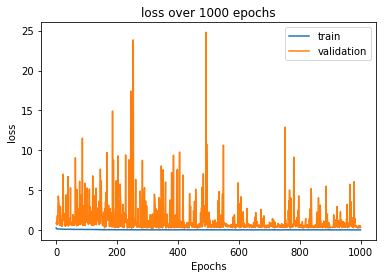

Average Training Score: 0.0457892064104393
Average Validation Score: 1.3522179999201247


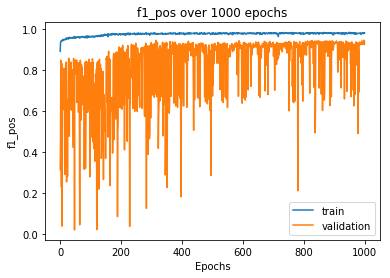

Average Training Score: 0.9742497613127175
Average Validation Score: 0.8146958251298099


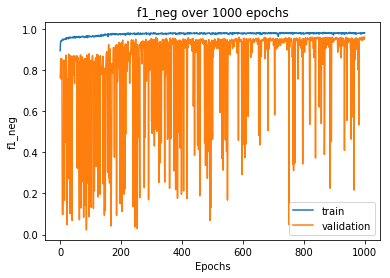

Average Training Score: 0.9752901852075146
Average Validation Score: 0.8206133824441768



In [4]:
from model_utils import create_model_architecture
from train_utils import train

use_gpu = True
device_name = 'cuda' if use_gpu else 'cpu'
print('device_name', device_name)

batch_size = 100

phases = ['train', 'val']
metric_types = ['loss', 'tn', 'fp', 'fn', 'tp', 'f1_pos', 'f1_neg']
metric_types_plot = ['loss', 'f1_pos', 'f1_neg']
metric_names_all = [p+'-'+m for p in phases for m in metric_types]
metric_names_plot = [p+'-'+m for p in phases for m in metric_types_plot]

all_metrics = {metric : [] for metric in metric_names_all}

num_training_epochs = 1000

data_loaders = {t : torch.utils.data.DataLoader(imagefolders[t], batch_size = batch_size, shuffle = True, num_workers = 4)
                for t in phases}

model = create_model_architecture('net1', use_gpu = use_gpu)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

trained_model, train_metrics = train(model,
                                     criterion,
                                     optimizer,
                                     data_loaders['train'],
                                     data_loaders['val'],
                                     num_epochs=num_training_epochs,
                                     use_gpu = use_gpu)

all_metrics = train_metrics

for metric in metric_types_plot:
    plot_values(all_metrics['train-' + str(metric)],
               all_metrics['val-' + str(metric)],
               str(metric) + " over " + str(num_training_epochs) + " epochs",
               ylabel = str(metric))

# write metrics to file
# write_metrics_to_csv(all_metrics, metric_names_all, 'net1-IAM-aa_64-raw_logs', 'all_metrics.csv')

print()


In [5]:
# write metrics to file
write_metrics_to_csv(all_metrics, metric_names_all, 'net1-aa_64-1000ep-raw_logs', 'all_metrics.csv')
torch.save(trained_model.state_dict(), 'models/net1-aa_64-1000ep.pt')

Wrote metrics to 'net1-aa_64-1000ep-raw_logs/all_metrics.csv'


In [6]:

# import sys
# import os
# sys.path.append(os.path.abspath('../../../'))
# from detection.lib.model.ImageROI import ImageROI
# from PIL import Image

# # book_data_dir = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images'
# # img_loc = book_data_dir + '/Dryden/positive/307.png'
# # Testing with image of dimensions 1000x1381

# img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'
# pilimg = Image.open(img_loc)
# w, h = pilimg.size
# imgrois = [ImageROI(0, 0, w, h)]
# imgarr = np.asarray(pilimg)

# from bounding_box_classification import get_pos_rois
# # net1 = Net1()

# # Modify this as necessary
# # imgrois = [ImageROI(0, 0, 1000, 700), ImageROI(0, 750, 1000, 500)]
# trained_model.train(False)
# with torch.set_grad_enabled(False):
#     pos_rois = get_pos_rois(trained_model,
#                             (pilimg, imgrois),
#                             model_transform = net1_data_transforms['test'],
#                             model_input_size = (64,64),
#                             stride=(32, 32))

# for rois in pos_rois:
#     for roi in rois:
#         print(roi.toString())
        
# all_rois = [roi for rois in pos_rois for roi in rois]
    
# print('number of pos ROIs found', len(all_rois))

# from detection.lib.ImgProcessor import ImgProcessor
# from detection.lib.utils.Utils import plt_img
# # plot the rois and plot only certain information according to the set
# # imgProcessor = ImgProcessor()
# # img = imgProcessor.loadImage(inFilename=img_loc)
# roi_level_set = set([1])
# plt_img(imgarr, rois=all_rois, roi_level_set=roi_level_set)

In [7]:

# import sys
# import os.path
# sys.path.append(os.path.abspath('../../../'))


# # from detection.lib.ImgProcessor import ImgProcessor
# import matplotlib.pyplot as plt
# import numpy as np
# from detection.lib.utils.Utils import *
# from detection.lib.OCREngine import OCREngine
# import pickle

# from PIL import Image

# # 1. parameters
# # root_dir = './sample'
# # img_id = '639'
# # fname = '%s.png' %img_id
# # ocr_engine = 'cv2'
# # f = '%s/%s' % (root_dir,fname)

# ocr_engine = 'tesseract'
# img_id = '1307'
# fname = '1307.png'
# f = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'

# # 2. Load the image
# # imgProcessor = ImgProcessor()
# # img = imgProcessor.loadImage(inFilename=f)
# img = np.asarray(Image.open(f))

# # 3. preprocess the image
# # img = imgProcessor.quickPreprocess(img)

# # 4. load the image ground truth
# # img_roi_ground_truth = all_ground_truth[img_id]

# # 5. define the OCR
# # define engine
# ocr = OCREngine(ocr_engine)
# img_roi_ocr, data_df = ocr.image_to_data(img)

# # plot the rois and plot only certain information according to the set
# # roi_level_set = set([2])
# # rois = [(img_roi_ground_truth,'b'), (img_roi_ocr,'r')]
# rois = [(img_roi_ocr,'r')]
# plt_img(img, rois=rois)#, roi_level_set=roi_level_set)

# # save the plot
# plt.savefig('./result/%s_%s_boxes.png' %(fname,ocr_engine))

# # save the bounding boxes to txt
# # save_rois(img_roi_ground_truth,'./result/%s_imgROIs_ground_truth.txt' %fname)
# save_rois(img_roi_ocr,'./result/%s_imgROIs.txt' %fname)

# # save the bounding boxes to pickle
# # with open('./result/%s_imgROIs.pkl' %fname,'wb') as f:
# #     pickle.dump({'ocr':img_roi_ocr, 'ground_truth':img_roi_ground_truth},f)

